# Proyecto 2: Modelación de Tsunami

**Fundamentos de Dinámica de Fluidos Computacional**<br>
**Profesor Christopher Cooper**<br>
**23 de Noviembre de 2017**

Valentina Oyarzún _201292003-5_<br>
Joaquín Echaíz _201223520-0_

***

# Contenidos

1. [Introducción: Simulación de un Tsunami en 1 y 2 Dimensiones](#one)
2. [Desarrollo](#two) <br>
    2.1. [Simluación en 1 Dimension](#two1) <br>
    2.2. [Simulación en 2 Dimensiones](#two2) <br>
3. [Resultados](#three)
4. [Análisis y Conclusiones](#four)<br>
    4.1. [Simulación en 1 Dimensión](#four1)<br>
    4.2. [Simulación en 2 Dimensiones](#four2)<br>

# Introducción: Simulación de un Tsunami en una y dos Dimensiones <a class="anchor" id="one"></a>

En este informe se modelarán las ecuaciones de aguas someras, las cuales son válidos para casos en que la profundidad es significativamente menor que las distancias en otras direcciones.

\begin{equation}
\frac{\partial U}{\partial t} + \nabla \cdot F = 0
\end{equation}

Esta ecuación es de forma conservadora, por lo tanto se puede discretizar usando el esquema Lax-Friedrichs, un metodo FTCS (_forward time, centered space_) en donde se remplaza $U^{n}_{i}$ con el promedio de los nodos adyacentes. Este método es incondicionalmente estable.

Cuando la ola llega al borde de la malla en la costa, se refleja. Las condiciones de borde reflectivas para esta instancia son las siguientes:

\begin{equation}
V = \left( u \text{, } v \right) = 0\\
\frac{\partial h}{\partial n} = 0\\
\end{equation}

Cuando la ola llega al borde de la malla en el mar, se va hacia el infinito. Las condiciones de borde de salida para esta instancia son las siguientes:

\begin{equation}
\frac{\partial u}{\partial n} = 0 \text{ , }
\frac{\partial v}{\partial n} = 0 \text{ , }
\frac{\partial h}{\partial n} = 0\\
\end{equation}


### Ecuaciones de Aguas Someras en 1D

Se definen las variables auxiliares $U_1$, $U_2$, $F_1$, $F_2$.

\begin{equation}
U_1 = h\\
U_2 = hu\\
F_1 = hu\\
F_2 = hu^2 + \frac{1}{2} g h^2\\
\end{equation}

Discretizando,

\begin{equation}
U^{n+1}_i = \frac{1}{2} \left(  U^n_{i+1} + U^n_{i-1} \right) - \frac{\Delta t }{2 \Delta x} \left(  F^n_{i+1} - F^n_{i-1} \right)\\
\end{equation}

Esta ecuación nos sirve para encontrar los datos adelantados en el tiempo, interiores en el espacio.
Condiciones de borde reflectivas:

\begin{equation}
\frac{\partial h}{\partial x} = \frac{\partial U_1}{\partial x} = 0 \longrightarrow U_1 \left[ -1 \right] = U_1 \left[ -2 \right]\\
u = 0 \longrightarrow U_2 \left[ -1 \right] = 0\\
\end{equation}

Condiciones de borde de salida:

\begin{equation}
\frac{\partial h}{\partial x} = \frac{\partial U_1}{\partial x} = 0 \longrightarrow U_1 \left[ 0 \right] = U_1 \left[ 1 \right]\\
\frac{\partial u}{\partial x} = \frac{\partial U_2}{\partial x} = 0 \longrightarrow U_2 \left[ 0 \right] = U_2 \left[ 1 \right]\\
\end{equation}


### Ecuaciones de Aguas Someras en 2D

Se definen las variables auxiliares $U_1$, $U_2$, $U_3$, $f_1$, $f_2$, $f_3$, $g_1$, $g_2$, $g_3$.

\begin{equation}
U_1 = h\\
U_2 = hu\\
U_2 = hv\\
f_1 = hu\\
f_2 = hu^2 + \frac{1}{2} g h^2\\
f_3 = huv\\
g_1 = hv\\
g_2 = huv\\
g_3 = hv^2 + \frac{1}{2} g h^2\\
\end{equation}

Discretizando,

\begin{equation}
U^{n+1}_{i,j} = \frac{1}{4} \left(  U^n_{i+1,j} + U^n_{i-1,j} + U^n_{i,j+1} + U^n_{i,j-1} \right) - \frac{\Delta t }{2 \Delta x} \left(  f^n_{i+1,j} - f^n_{i-1,j} \right) - \frac{\Delta t }{2 \Delta y} \left(  g^n_{i,j+1} - g^n_{i,j-1} \right)\\
\end{equation}

Nuevamente, esta ecuación nos sirve para encontrar los datos adelantados en el tiempo, interiores en el espacio.
Condiciones de borde reflectivas, Norte y Este:

\begin{equation}
\frac{\partial h}{\partial n} = \frac{\partial U_1}{\partial x} = 0 \longrightarrow U_1 \left[ -1 \right] = U_1 \left[ -2 \right]\\
u = 0 \longrightarrow U_2 \left[ -1 \right] = 0\\
v = 0 \longrightarrow U_2 \left[ -1 \right] = 0\\
\end{equation}

Condiciones de borde de salida:

\begin{equation}
\frac{\partial h}{\partial x} = \frac{\partial U_1}{\partial x} = 0 \longrightarrow U_1 \left[ 0 \right] = U_1 \left[ 1 \right]\\
\frac{\partial u}{\partial x} = \frac{\partial U_2}{\partial x} = 0 \longrightarrow U_2 \left[ 0 \right] = U_2 \left[ 1 \right]\\
\end{equation}

### Presentación del Problema

Se modela el choque de una ola generada cerca de una costa.

1. Dominio: $-2 \leq x \leq 2$ <br>
2. Altura del agua en reposo: $ h_0 = 1$ <br>
3. Perfil inicial: $ h(x, t= 0) = h_0 + \Delta_{h} e^{-5 x^2}$ <br>
4. Paso de tiempo: $ dt = 2 \times 10^{-3}$ <br>
5. Malla: $501$ elementos para 1D; $401$ elementos para 2D.


In [18]:
import numpy
import matplotlib.pyplot as plt
numpy.set_printoptions(precision=3)
%matplotlib inline
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# 2. Desarrollo <a class="anchor" id="two"></a>

## 2.1 Simulación en una Dimensión <a class="anchor" id="one"></a>

En una sola dimensión, 

In [2]:
nx  = 501
dx   = 4./(nx-1)
x   = numpy.linspace(-2, 2, nx)
dt  = 2*10**(-3)
g   = 9.81

h_0 = 1
dh  = 0.4

** Condiciones de borde, $x =2$**
\begin{align}
\frac{\partial U_1}{\partial x} = 0  \text{  ,  }  U_2 = 0\\
\end{align}

** Condiciones de borde, $x = -2$**
\begin{align}
\frac{\partial U_1}{\partial x} = 0 \text{  ,  } \frac{\partial U_2}{\partial x} = 0\\
\end{align}

** Discretización para $U_1$ y $U_2$ **
\begin{align}
U_{i}^{n+1}= \frac{1}{2} \left(  U_{i+1}^{n} + U_{i-1}^{n} \right) - \frac{\Delta t}{2 \Delta x} \left( F_{i+1}^{n} - F_{i-1}^{n} \right)\\
\end{align}

Pared: <br>
\begin{align}
U_1 \left[-1 \right] = U_1\left[-2\right]  \text{  ,  }  U_2  \left[-1\right] = 0\\
\end{align}

Mar: <br>
\begin{align}
U_1 \left[ 0\right] = U_1 \left[1\right]\\
U_2 \left[ 0\right] = U_2 \left[1\right]\\
\end{align}

In [3]:
def tsunami1D(h_0, dh, dx, dt):
    
    h_t0 = h_0 + dh*numpy.exp(-5*x**2)
    u_t0 = numpy.zeros(nx)
    
    h = h_t0
    u = u_t0
    #h_max = numpy.amax(h)
    
    pasos = 0
    
    while True:
        #while h[-1]!= h_max:
        
        U1 = h
        U2 = h*u
        F1 = h*u
        F2 = h*u**2+.5*g*h**2
        
        U1_n = U1.copy()
        U2_n = U2.copy()
        
        U1[1:-1] = .5*(U1_n[2:]+U1_n[:-2])-(dt/(2*dx))*(F1[2:]-F1[:-2])
        U2[1:-1] = .5*(U2_n[2:]+U2_n[:-2])-(dt/(2*dx))*(F2[2:]-F2[:-2])

        U1[-1] = U1[-2]
        U2[-1] = 0
        U1[0]  = U1[1]
        U2[0]  = U2[1]

        u = U2/U1
        h = U1
        h_max = numpy.amax(h)
        
        pasos +=1 
        
        if h[-1]==h_max:
            break
        
    return u, h, pasos

Se requieren 232  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.464  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0499298897901 m/s
Altura maxima al tocar la costa  1.24982724016 m


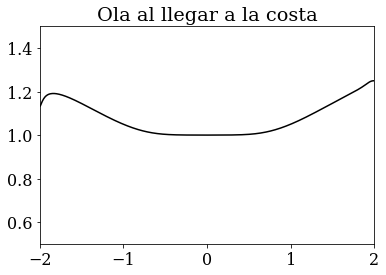

In [4]:
# Cuantos pasos de tiempo tarda en que el maximo llegue a la costa

uf, hf, pasosf = tsunami1D(h_0, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

Se requieren 290  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.58  segundos
Velocidad final del punto maximo al llegar a la costa es 0.111186717917 m/s
Altura maxima al tocar la costa  0.715302660628 m


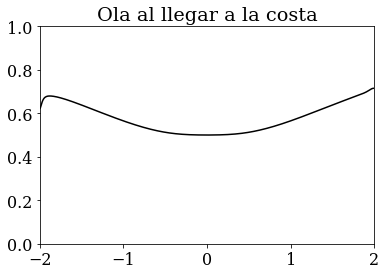

In [5]:
# Para h_0 = 0.5 m

uf, hf, pasosf = tsunami1D(0.5, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0, 1])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()


Se requieren 200  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.4  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0330255085188 m/s
Altura maxima al tocar la costa  1.77008463845 m


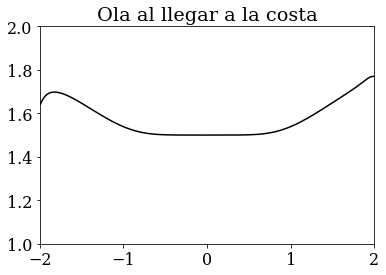

In [6]:
# Para h_0 = 1.5 m
uf, hf, pasosf = tsunami1D(1.5, dh, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 1, 2])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

Se requieren 240  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.48  segundos
Velocidad final del punto maximo al llegar a la costa es 0.0271925905468 m/s
Altura maxima al tocar la costa  1.18639878657 m


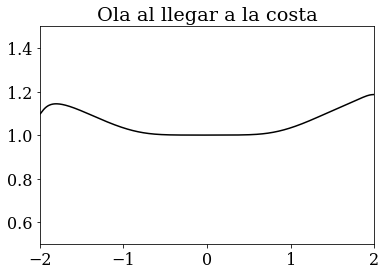

In [7]:
# Para dh = 0.3m

uf, hf, pasosf = tsunami1D(h_0, 0.3, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

Se requieren 219  pasos de tiempo para que la ola llegue a la costa, equivalente a  0.438  segundos
Velocidad final del punto maximo al llegar a la costa es 0.219448056142 m/s
Altura maxima al tocar la costa  1.44850753425 m


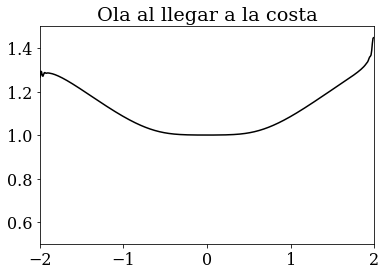

In [8]:
# Para dh = 0.6m

uf, hf, pasosf = tsunami1D(h_0, 0.6, dx, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[-2], "m/s")
print("Altura maxima al tocar la costa ", hf[-1],"m")

plt.axis([-2, 2, 0.5, 1.5])
plt.plot(x, hf, c='k')
plt.title('Ola al llegar a la costa')
plt.show()

# Simulación en 2 Dimensiones

### Condiciones Iniciales

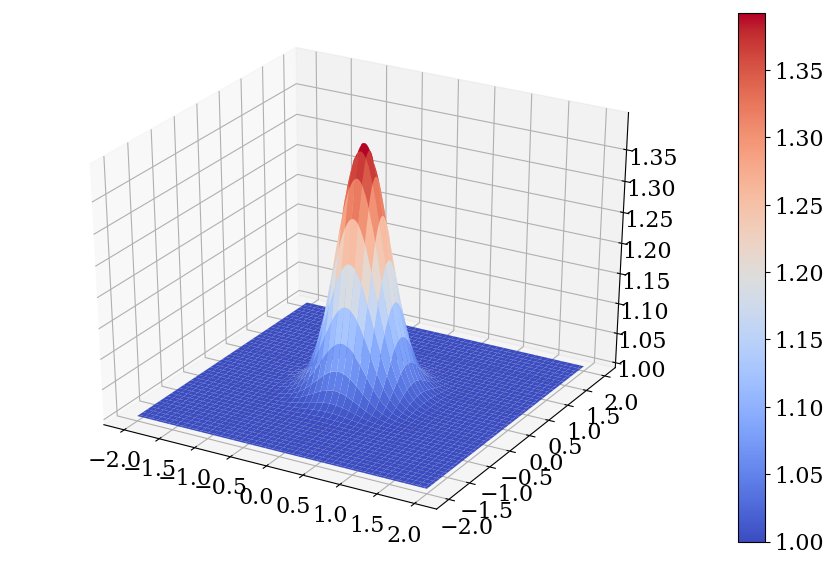

In [10]:
N  = 401
dt = 2*10**(-3)

delta = 4./(N-1)
x = numpy.linspace(-2, 2, N)
y = numpy.linspace(2, -2, N) 
X, Y = numpy.meshgrid(x,y)

g   = 9.81

dh  = 0.4
h_0 = 1
h_t0 = h_0 + dh*numpy.exp(-5*(X**2+Y**2))

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
#plt.axis([-2, 2, -2, 2, 0.4, 1.4])
grafico = ax.plot_surface(X, Y, h_t0, cmap='coolwarm');
plt.colorbar(grafico)

** Condiciones de borde, $x =2$**
\begin{align}
\frac{\partial U_1}{\partial x} = 0  \text{  ,  }  U_2 = 0\\
\end{align}

** Condiciones de borde, $x = -2$**
\begin{align}
\frac{\partial U_1}{\partial x} = 0 \text{  ,  } \frac{\partial U_2}{\partial x} = 0\\
\end{align}

** Discretización para $U_1$ y $U_2$ **
\begin{align}
U_{i}^{n+1}= \frac{1}{2} \left(  U_{i+1}^{n} + U_{i-1}^{n} \right) - \frac{\Delta t}{2 \Delta x} \left( F_{i+1}^{n} - F_{i-1}^{n} \right)\\
\end{align}

Pared: <br>
\begin{align}
U_1 \left[-1 \right] = U_1\left[-2\right]  \text{  ,  }  U_2  \left[-1\right] = 0\\
\end{align}

Mar: <br>
\begin{align}
U_1 \left[ 0\right] = U_1 \left[1\right]\\
U_2 \left[ 0\right] = U_2 \left[1\right]\\
\end{align}

In [11]:
def tsunami2D(h_0, dh, delta, dt):
    
    h_t0 = h_0 + dh*numpy.exp(-5*(X**2+Y**2))
    u_t0 = numpy.zeros((N,N))
    v_t0 = numpy.zeros((N,N))
    
    h = h_t0
    u = u_t0
    v = v_t0
    
    #h_max = numpy.amax(h)
    
    pasos = 0
    
    while True:        
        U1 = h
        U2 = h*u
        U3 = h*v
        f1 = h*u
        f2 = h*u**2+.5*g*h**2
        f3 = h*u*v
        g1 = h*v
        g2 = h*u*v
        g3 = h*v**2+.5*g*h**2
        
        U1_n = U1.copy()
        U2_n = U2.copy()
        U3_n = U3.copy()
        
        U1[1:-1, 1:-1] = .25*(U1_n[2:, 1:-1] + U1_n[:-2, 1:-1] + U1_n[1:-1, 2:] + U1_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f1[2:, 1:-1] - f1[:-2, 1:-1] + g1[1:-1, 2:] - g1[1:-1,:-2])
            
        U2[1:-1, 1:-1] = .25*(U2_n[2:, 1:-1] + U2_n[:-2, 1:-1] + U2_n[1:-1, 2:] + U2_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f2[2:, 1:-1] - f2[:-2, 1:-1] + g2[1:-1, 2:] - g2[1:-1,:-2])
            
        U3[1:-1, 1:-1] = .25*(U3_n[2:, 1:-1] + U3_n[:-2, 1:-1] + U3_n[1:-1, 2:] + U3_n[1:-1, :-2])\
                         -(dt/(2*delta))*(f3[2:, 1:-1] - f3[:-2, 1:-1] + g3[1:-1, 2:] - g3[1:-1,:-2])

        
        # Condicion borde norte
        U1[0, 1:-1] = U1[1, 1:-1]
        U2[0, 1:-1] = 0
        U3[0, 1:-1] = 0
        
        # Condicion borde este
        U1[1:-1, -1] = U1[1:-1, -2]
        U2[1:-1, -1] = 0
        U3[1:-1, -1] = 0
        
        # Condicion borde oeste
        U1[1:-1, 0] = U1[1:-1, 1]
        U2[1:-1, 0] = U2[1:-1, 1]
        U3[1:-1, 0] = U3[1:-1, 1]
        
        # Condicion borde sur
        U1[-1, 1:-1] = U1[-2, 1:-1]
        U2[-1, 1:-1] = U2[-2, 1:-1]
        U3[-1, 1:-1] = U3[-2, 1:-1]

        # Esquina N-O
        U1[0,0] = U1[1,1]
        U2[0,0] = U2[1,1]
        U3[0,0] = U3[1,1]
        
        # Esquina N-E
        U1[0,-1] = U1[1,-2]
        U2[0,-1] = U2[1,-2]
        U3[0,-1] = U3[1,-2]
        
        # Esquina E-S
        U1[-1, -1] = U1[-2, -2]
        U2[-1, -1] = U2[-2, -2]
        U3[-1, -1] = U3[-2, -2]
        
        # Esquina O-S
        U1[-1, 0] = U1[-2, 1]
        U2[-1, 0] = U2[-2, 1]
        U3[-1, 0] = U3[-2, 1]
        
        u = U2/U1
        v = U3/U1
        h = U1
        h_max = numpy.amax(h)
        
        pasos +=1 
        
        if numpy.amax(h[:,0])==h_max or numpy.amax(h[-1,:])==h_max:
            break
        
    return u, v, h, pasos

Se requieren 905  pasos de tiempo para que la ola llegue a la costa, equivalente a  1.81  segundos


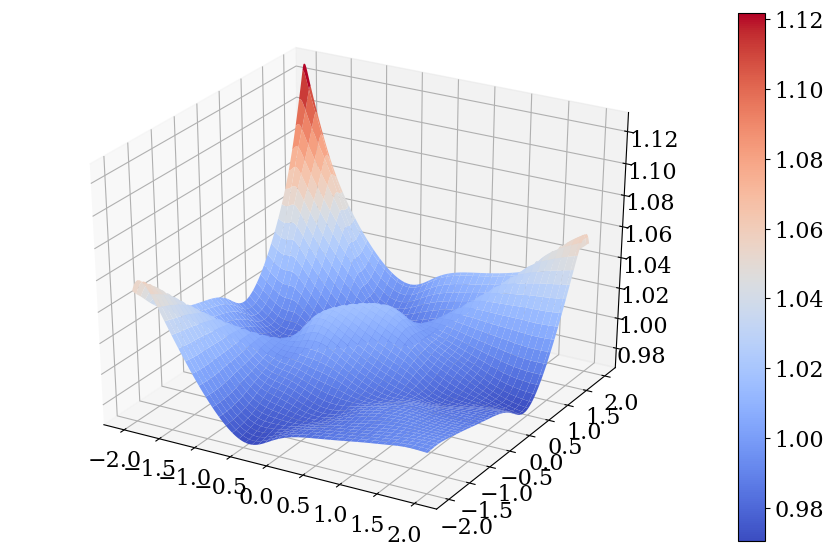

In [12]:
uf, vf, hf, pasosf = tsunami2D(h_0, dh, delta, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[0,-1], "m/s")
print("Altura maxima al tocar la costa ", hf[0,-1],"m")

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
#plt.axis([-2, 2, -2, 2, 0.4, 1.4])
grafico = ax.plot_surface(X, -Y, hf, cmap='coolwarm');
plt.colorbar(grafico)

In [16]:
uf, vf, hf, pasosf = tsunami2D(1.5, dh, delta, dt)

print("Se requieren", pasosf, " pasos de tiempo para que la ola llegue a la costa, equivalente a ",dt*pasosf," segundos")
print("Velocidad final del punto maximo al llegar a la costa es", uf[0,-1], "m/s")
print("Altura maxima al tocar la costa ", hf[0,-1],"m")

fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
#plt.axis([-2, 2, -2, 2, 0.4, 1.4])
grafico = ax.plot_surface(X, -Y, hf, cmap='coolwarm');
plt.colorbar(grafico)

C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in square
C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract
C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract
C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply
C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in multiply
C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply
C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
C:\Users\Vale\Anaconda3\lib\site-packages\ipykernel_launch

KeyboardInterrupt: 

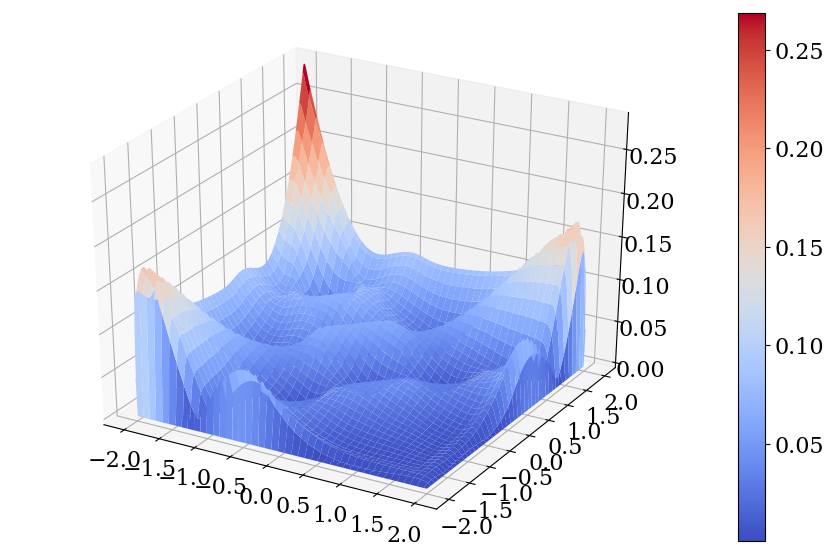

In [14]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
#plt.axis([-2, 2, -2, 2, 0.4, 1.4])
c = numpy.sqrt(vf**2+uf**2)
grafico = ax.plot_surface(X, -Y, c, cmap='coolwarm');
plt.colorbar(grafico)